In [1]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import colormaps
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import numpy as np

### Load and type the data

In [2]:
INPUT_FILE = "bounded_polygons.geojson"

In [3]:
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    geojson_obj = json.load(f)

# -------------------------------------------------
#   Convert each feature to a Shapely geometry
# -------------------------------------------------
features = geojson_obj["features"]
records = []   # property dictionaries
geoms   = []   # Shapely geometry objects

for feat in features:
    geom = shape(feat["geometry"])
    geoms.append(geom)

    # Ensure the area is a float (just in case)
    props = feat["properties"].copy()
    props["area"] = float(props.get("area", 0))
    props["urban"]  = int(props.get("urban"))
    props["type"]   = str(props.get("type", ""))
    props["admin_area"] = int(props.get("admin_area"))
    records.append(props)

# Create gopandas data frame
gdf = gpd.GeoDataFrame(records, geometry=geoms, crs="EPSG:4326") 
gdf["poplation_density"] = gdf["population"]*gdf["area"]

In [4]:
gdf.head()

,id,admin_area,vertices,area,urban,type,population,geometry,poplation_density
0,1,0,5,0.001817,0,agricultural,496,"POLYGON ((0.06535 0.3574, 0.05718 0.35661, 0.0...",0.901440
1,2,3,5,0.001960,0,agricultural,538,"POLYGON ((0.77047 0.42155, 0.7869 0.42314, 0.8...",1.054372
2,3,1,5,0.001219,1,market_town,520,"POLYGON ((0.30178 0.45075, 0.35045 0.41337, 0....",0.633699
3,4,4,6,0.005411,0,agricultural,481,"POLYGON ((0.19736 0.66653, 0.13587 0.67452, 0....",2.602843
4,5,1,9,0.002375,0,agricultural,521,"POLYGON ((0.42637 0.36177, 0.44516 0.38311, 0....",1.237286


### Plot population density

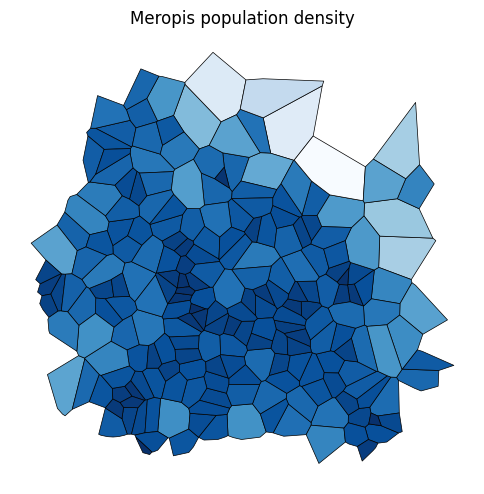

In [5]:
cmap = plt.get_cmap("Blues_r")          # "_r" makes it reversed: small → dark, large → light

# Normalise the area values to the range [0, 1] for the colormap
pop_norm = mcolors.Normalize(vmin=gdf["poplation_density"].min(), vmax=gdf["poplation_density"].max())

# -------------------------------------------------
#   Plot the polygons, colouring by area
# -------------------------------------------------
ax = gdf.plot(
    column="poplation_density",          # tell GeoPandas which column drives the colour
    cmap=cmap,              # our dark‑to‑light colour map
    norm=pop_norm,              # use the normaliser defined above
    edgecolor="black",
    linewidth=0.5,
    figsize=(6, 6),
    legend=False,            # optional: adds a colour bar legend
)

ax.set_title("Meropis population density")
ax.set_axis_off()

# Optional: save the figure

plt.show()

### Save as Shape file

In [6]:
def save_as_shape():
    output_path = "shape/meropis.shp"
    gdf.to_file(output_path, driver="ESRI Shapefile")

In [7]:
save_as_shape()

/tmp/ipykernel_63068/3479001696.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_path, driver="ESRI Shapefile")
/home/ric/Venvs/venv/lib/python3.13/site-packages/pyogrio/raw.py:733: RuntimeWarning: Normalized/laundered field name: 'poplation_density' to 'poplation_'
  ogr_write(
